## PHYS 105A:  Introduction to Scientific Computing

# Numerical Integrator

In this assignment, we will see some of the limitations on numerical integrators, and find ways to improve them.

In [33]:
# Step 1. Import Libraries

import numpy as np
from matplotlib import pyplot as plt

In [34]:
# Step 2. Define standard numerical integrals
#
# There is nothing complicated that you need to do here.
# Simply copy and paste the functions in the lecture note from last week.

def trapezoidal(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    return np.sum(f(X[1:])+f(X[:-1])) * 0.5 * D

def Simpson(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N//2):
        l = X[2*i]
        m = X[2*i+1]
        r = X[2*i+2]
        S += D * (f(l) + 4*f(m) + f(r)) / 3
    return S


def Bode(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N//4):
        x0 = X[4*i]
        x1 = X[4*i+1]
        x2 = X[4*i+2]
        x3 = X[4*i+3]
        x4 = X[4*i+4]
        S += D * (14*f(x0) + 64*f(x1) + 24*f(x2) + 64*f(x3) + 14*f(x4)) / 45
    return S

In [65]:
np.linspace(0, 5, N+2, retstep=True)

(array([0.        , 0.71428571, 1.42857143, 2.14285714, 2.85714286,
        3.57142857, 4.28571429, 5.        ]),
 0.7142857142857143)

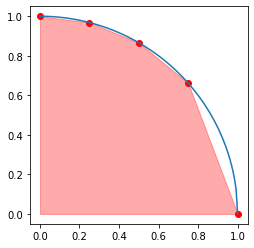

In [35]:
# Step 3. Define a function that breaks our integrators...
#
# Since we have worked on integrating pi for many times, let's define a quarter circle again!

def h(x):
    return np.sqrt(1 - x * x)

X = np.linspace(0, 1, 5)
Y = h(X)

x = np.linspace(0, 1, 129) # define a fine grid for plotting
plt.plot(x, h(x))
plt.scatter(X, Y, color='r')
plt.fill_between(X, h(X), color='r', alpha=0.33)
plt.gca().set_aspect('equal')

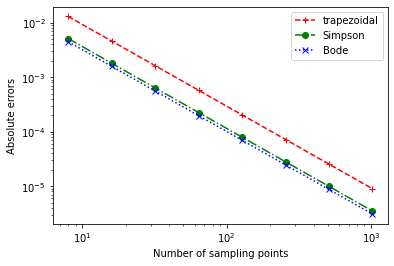

In [36]:
# Step 4. Apply the integrators

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

err_t = [abs(trapezoidal(h, N) - np.pi/4) for N in Ns]
err_S = [abs(Simpson(h, N)     - np.pi/4) for N in Ns]
err_B = [abs(Bode(h, N)        - np.pi/4) for N in Ns]

plt.loglog(Ns, err_t, '+--', color='r', label='trapezoidal')
plt.loglog(Ns, err_S, 'o-.', color='g', label='Simpson')
plt.loglog(Ns, err_B, 'x:',  color='b', label='Bode')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

What is the convergent rate?  Is this expected?  Please write down your answers below.

`ANS`: ...

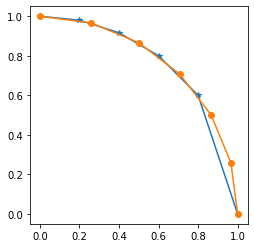

In [77]:
# Step 5. Idea: use smaller steps as we apporach one.
#
# We don't have to rewrite the integrators from scratch.
# We can reduce the functions we implemented above.
# See trapezoidal_adaptive() as an example.

# X are our collocation points. So far, we have worked
# with uniformly distributed ones, but we can choose
# another distribution, e.g., sinuisoidal. Have a look
# at how the new points look much smoother.

N=6
X_unif = np.linspace(0, 1, N)
X_sin = np.sin(np.pi/2 * np.arange(N+1)/N)
plt.plot(X_unif, h(X_unif), marker="*")
plt.plot(X_sin, h(X_sin), marker="o")
plt.gca().set_aspect('equal')

# We can implement this in our integrators

def trapezoidal_adaptive(h, N):
    X = np.sin(np.pi/2 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += trapezoidal(h, N=1, a=X[i], b=X[i+1])
    return S

def Simpson_adaptive(h, N):
    N = N//2
    X = np.sin(np.pi/2 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += Simpson(h, N=2, a=X[i], b=X[i+1])
    return S
    
def Bode_adaptive(h, N):
    N = N//4
    X = np.sin(np.pi/2 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += Bode(h, N=4, a=X[i], b=X[i+1])
    return S

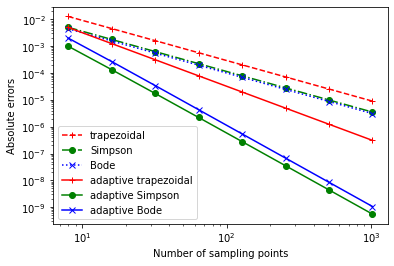

In [79]:
# Step 6. Test the result

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

err_ta = [abs(trapezoidal_adaptive(h, N) - np.pi/4) for N in Ns]
err_Sa = [abs(Simpson_adaptive(h, N)     - np.pi/4) for N in Ns]
err_Ba = [abs(Bode_adaptive(h, N)        - np.pi/4) for N in Ns]

plt.loglog(Ns, err_t,  '+--', color='r', label='trapezoidal')
plt.loglog(Ns, err_S,  'o-.', color='g', label='Simpson')
plt.loglog(Ns, err_B,  'x:',  color='b', label='Bode')
plt.loglog(Ns, err_ta, '+-',  color='r', label='adaptive trapezoidal')
plt.loglog(Ns, err_Sa, 'o-',  color='g', label='adaptive Simpson')
plt.loglog(Ns, err_Ba, 'x-',  color='b', label='adaptive Bode')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

What is the convergent rate?  Is this expected?  Please write down your answers below.

`ANS`: ...

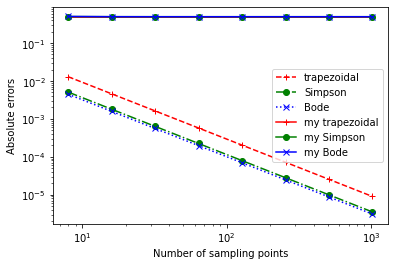

In [80]:
# Step 7. Come up with some other idea to improve the convergent rate.
#
# One possibility, take advantage of the symmetry of the circle.
# What if we integrate 1/8 of a circle instead?
#
# Please implement the integrations and make the convergence plots.

def mytrapezoidal(h, N):
    X = np.sin(np.pi/4 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += trapezoidal(h, N=1, a=X[i], b=X[i+1])
    return (S-1/2)*2

def mySimpson(h, N):
    N = N//2
    X = np.sin(np.pi/2 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += Simpson(h, N=2, a=X[i], b=X[i+1])
    return (S-1/2)*2

def myBode(h, N):
    N = N//4
    X = np.sin(np.pi/2 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += Bode(h, N=4, a=X[i], b=X[i+1])
    return (S-1/2)*2

def h(x):
    return (np.sqrt(1 - x * x)-1/2)*2

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

err_tb = [abs(mytrapezoidal(h, N) - 2 / np.pi) for N in Ns]
err_Sb = [abs(mySimpson(h, N)     - 2 / np.pi) for N in Ns]
err_Bb = [abs(myBode(h, N)        - 2 / np.pi) for N in Ns]

plt.loglog(Ns, err_t,  '+--', color='r', label='trapezoidal')
plt.loglog(Ns, err_S,  'o-.', color='g', label='Simpson')
plt.loglog(Ns, err_B,  'x:',  color='b', label='Bode')
plt.loglog(Ns, err_tb, '+-',  color='r', label='my trapezoidal')
plt.loglog(Ns, err_Sb, 'o-',  color='g', label='my Simpson')
plt.loglog(Ns, err_Bb, 'x-',  color='b', label='my Bode')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

What is the convergent rate?  Is this expected?  Please write down your answers below.

`ANS`: ...